## Abrindo o arquivo de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('~/Área de Trabalho/desafio_kognita/_data/dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8')

In [3]:
df.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0


## Limpeza da base

In [4]:
# Verificando valores únicos para a variável
df['tipo_sociedade'].unique()

array(['empresario (individual)', 'sociedade empresaria limitada',
       'empresa individual respons limitada empresaria',
       'empresario-mei(microempreendedor individual)',
       'sociedade anonima fechada', 'missing', 'cooperativa',
       'sociedade de economia mista', 'fundacao privada',
       'outras formas de associacao', 'sociedade anonima aberta',
       'sociedade simples pura', 'sociedade simples limitada',
       'organizacao religiosa', 'servico social autonomo', 'municipio',
       'entidade sindical'], dtype=object)

In [5]:
# Verificando valores únicos para a variável
df['opcao_tributaria'].unique()

array(['simples nacional', 'missing', 'lucro real', 'lucro presumido',
       'isento'], dtype=object)

In [6]:
# Verificando valores únicos para a variável
df['atividade_principal'].unique()

array(['papelaria', 'com de equipamentos de informatica',
       'servicos de vigilancia e guarda',
       'com de compon eletron e pecas para eletrod',
       'farmacia e drogaria', 'bazar, armarinho e miudezas em geral',
       'com de livros, revistas e jornais', 'com de moveis e estofados',
       'com de brinquedos', 'servicos de telefonia fixa', 'comercio',
       'com de confeccoes em geral', 'servicos',
       'com de telefones e equip p/ comunicacoes',
       'repar/ manut de equip indls e de comunicacao', 'missing',
       'com de eletrodomesticos', 'com de auto pecas e acessorios',
       'com de motocicletas, pecas e acessorios', 'loja de departamentos',
       'com atac-prod farmac, perfumaria, cosmeticos',
       'provedor de acesso a rede de computadores',
       'com de instrumentos e materiais para uso med',
       'com de tratores e implementos agricolas',
       'com de artigos ortopedicos',
       'com de maquinas e equip para escritorio', 'com de bebidas',
       '

In [7]:
# Verificando valores únicos para a variável
df['forma_pagamento'].unique()

array(['30/60/90', 'missing', '28 dias', '30/45', '60/90/120',
       '30/60/90/120', '30 dias', '35/49/63/77/91', '120', '28/56/84',
       '28/42/56', '28/35/42 dd', '30/60', '60/90/120/150/180/210',
       '42/49/56/63/70', '21/28/35/42/49/56/63', '120/150/180',
       '30/60/90/120/150', '42 dias', '21/29/35 dd', '21/28/35/42/49',
       'boleto 7 dias', '49/56/63', '30/45/60', '14/28/42', '14',
       '28/42/56/70/84/98/112', '28/56', '55/62/69/76/83/90/97',
       '10/40/70', '28/42 dd', '40,70,100,130', '28/42/56/70/84',
       '60 dias', '21', '28/35/42/49/56', '35/42/49/56/63', '42/49/56',
       '90/120/150', 'boleto14/21/28/35/42', '10', '30/45/60/75/90',
       '35/42/49', '12 vezes, 1a, 30dd', '10x,1a. 30dd', '14/28/42/56/70',
       '140 dias', '14/28', '30/45/60/75/90/105/120', '60/90',
       '27/34/41/48/55/62/69', '56 dias', '80 dias', '42/56/70',
       'boleto 14 dias', '75', 'boleto 28 dias', '20/40/60/80/100',
       '35 dd', '35/49', '30/60/90/120/150/180/210/240

In [8]:
# Limpando a base de variáveis categóricas com valores faltantes
df_drop_objetos = df.drop(['forma_pagamento', 'atividade_principal', 'opcao_tributaria', 'tipo_sociedade'], axis=1)

In [9]:
# Lendo a nova base
df_drop_objetos.head()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.00,0.0,242100.70,0,0.0,0,0.0,0.0,0.0,0,0,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.85,0.0,4960846.21,0,0.0,0,0.0,0.0,0.0,0,0,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.83,0.0,158631.93,1,1800.0,0,0.0,0.0,0.0,0,0,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.64,0.0,669644.16,0,0.0,0,0.0,0.0,0.0,0,0,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.00,0.0,2010.56,0,0.0,0,0.0,0.0,0.0,0,0,2655.505663,10,2017,0


In [10]:
# Medidas descritivas da nova base
df_drop_objetos.describe()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
count,117273.000000,117273.000000,117273.000000,1.172730e+05,1.172730e+05,1.172730e+05,117273.000000,1.172730e+05,117273.000000,1.172730e+05,117273.0,1.172730e+05,117273.000000,117273.000000,1.172730e+05,117273.000000,117273.000000,117273.000000
mean,0.148721,55.582906,17.106291,6.421384e+04,2.454043e+03,1.085557e+06,0.240456,2.051017e+03,0.018922,9.218511e+02,0.0,5.603808e+02,0.014974,0.000622,2.406180e+04,6.279169,2017.976798,0.166662
std,0.853794,60.989240,10.993605,5.252546e+05,8.093313e+04,7.444825e+06,10.707825,8.831758e+04,0.534034,4.861025e+04,0.0,8.459291e+04,0.397264,0.030759,4.906680e+05,3.194997,0.742185,0.372676
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,-7.446899e+02,1.000000,2017.000000,0.000000
25%,0.000000,20.166667,11.121543,5.657400e+02,0.000000e+00,1.944250e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,2.140419e+03,3.000000,2017.000000,0.000000
50%,0.000000,38.000000,16.000000,4.451740e+03,0.000000e+00,8.134878e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,4.012731e+03,7.000000,2018.000000,0.000000
75%,0.000000,69.750000,18.248850,2.006296e+04,0.000000e+00,3.322643e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,9.645923e+03,9.000000,2019.000000,0.000000
max,26.000000,951.000000,90.000000,7.219759e+07,1.315050e+07,4.603203e+08,2324.000000,1.630546e+07,80.000000,8.390986e+06,0.0,1.972251e+07,40.000000,2.000000,1.503340e+08,12.000000,2019.000000,1.000000


In [11]:
# Matriz de correação da nova base
corr_matrix = df_drop_objetos.corr()
(corr_matrix.style.background_gradient(cmap='Greens', axis=None))

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
default_3months,1.000000,-0.075619,-0.076480,0.027441,0.007801,0.017593,0.019165,0.015839,-0.003254,-0.003219,nan,-0.001110,-0.004177,-0.003525,-0.001352,-0.036273,0.027959,0.221207
ioi_36months,-0.075619,1.000000,0.102725,-0.071111,-0.018787,-0.089667,-0.005921,-0.010368,-0.012944,-0.008454,nan,0.002877,-0.009869,-0.010774,-0.011739,0.013182,0.064021,0.049437
ioi_3months,-0.076480,0.102725,1.000000,-0.081404,-0.021778,-0.098476,-0.008792,-0.011437,-0.018999,-0.012632,nan,-0.001332,-0.013788,-0.002463,-0.014965,0.076976,0.043292,0.004692
valor_por_vencer,0.027441,-0.071111,-0.081404,1.000000,0.648538,0.776372,0.049219,0.064702,0.278948,0.169179,nan,0.158321,0.174406,0.000932,0.064616,-0.006621,-0.017736,-0.023777
valor_vencido,0.007801,-0.018787,-0.021778,0.648538,1.000000,0.516685,0.035051,0.054827,0.136905,0.150716,nan,0.066330,0.111832,0.001002,0.018239,-0.006639,-0.014874,-0.006401
valor_quitado,0.017593,-0.089667,-0.098476,0.776372,0.516685,1.000000,0.053542,0.068094,0.319622,0.177936,nan,0.153009,0.171415,0.001701,0.059506,-0.029219,-0.023327,-0.036228
quant_protestos,0.019165,-0.005921,-0.008792,0.049219,0.035051,0.053542,1.000000,0.563431,0.221102,0.382113,nan,0.048268,0.248005,0.070380,0.002229,-0.014863,0.003263,0.001900
valor_protestos,0.015839,-0.010368,-0.011437,0.064702,0.054827,0.068094,0.563431,1.000000,0.528555,0.574293,nan,0.077167,0.453837,0.018335,0.002552,-0.018695,0.007624,0.001198
quant_acao_judicial,-0.003254,-0.012944,-0.018999,0.278948,0.136905,0.319622,0.221102,0.528555,1.000000,0.708334,nan,0.515823,0.638950,-0.000717,0.008933,-0.012397,-0.004701,-0.011989
acao_judicial_valor,-0.003219,-0.008454,-0.012632,0.169179,0.150716,0.177936,0.382113,0.574293,0.708334,1.000000,nan,0.265400,0.484621,-0.000384,0.001053,-0.014663,-0.002302,-0.008127


In [12]:
# Atribuição de variável
base_limpa = df_drop_objetos

In [13]:
# Verificando a quantidade de defaults na base limpa
base_limpa['default'].value_counts()

0    97728
1    19545
Name: default, dtype: int64

## Separando as bases de treino e teste

In [15]:
# Separando a variável dependente
y = base_limpa['default']

In [16]:
# Separando as variáveis independentes
X = base_limpa[['valor_quitado', 'valor_por_vencer', 'valor_vencido']]

In [17]:
# Separando as bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinando o modelo

In [18]:
# Instanciando o modelo
modelo = RandomForestClassifier(n_estimators=500,
                               bootstrap=True,
                               max_features='sqrt')

In [19]:
# Treinando o modelo
modelo.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

## Realizando os predicts

In [20]:
# Realizando os predicts a partir do modelo, predict default e predicts prováveis
predict_treino = modelo.predict(X_train)
predict_probab = modelo.predict_proba(X_train)[:, 1]

predicts = modelo.predict(X_test)
probab = modelo.predict_proba(X_test)[: ,1]

## Analisando o modelo

### Curva ROC

In [21]:
# Checagem da curva AUC-ROC do modelo
valor_roc = roc_auc_score(y_test, probab)

In [22]:
valor_roc.round(2)

0.77

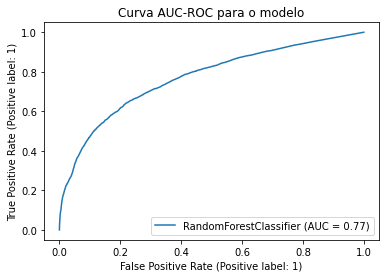

<Figure size 504x504 with 0 Axes>

In [23]:
# Visualização da curva AUC-ROC
metrics.plot_roc_curve(modelo, X_test, y_test)
plt.title('Curva AUC-ROC para o modelo')
plt.figure(figsize=(7,7))
plt.show()

## Matriz de confusão

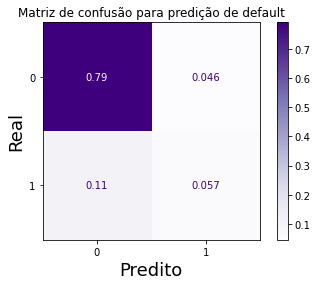

In [25]:
# Visualizando a matriz de confusão normalizada para o modelo
plot_confusion_matrix(modelo, X_test, y_test, cmap='Purples', normalize='all') 
plt.ylabel('Real', size = 18)
plt.xlabel('Predito', size = 18)
plt.title('Matriz de confusão para predição de default')
plt.show()

***********

## Simulando uma predição

In [27]:
# Valores retirados diretamente da base
valor_quitado = 4.000861e+04
valor_por_vencer = 19281.291534
valor_vencido = 0.0
entrada = [[valor_quitado, valor_por_vencer, valor_vencido]]

# Função de simulação
def simulador(entrada):
    if modelo.predict(entrada)[0] == 0:
        print('Default: {}, bom pagador.'.format(modelo.predict(entrada)[0]))
    else:
        print('Default: {}, mau pagador.'.format(modelo.predict(entrada)[0]))

In [29]:
# Aplicação do simulador
simulador(entrada)

Default: 1, mau pagador.


## Exportando o modelo

In [31]:
# Exportação do modelo 
output = open('modelo_credit_score', 'wb')
pickle.dump(modelo, output)
output.close()

## Conclusões

O modelo mostrou um bom desempenho na avaliação da curva ROC (próximo de 1) e também bom desempenho na predição de verdadeiros positivos. Em razão disso, é possível que exista uma situação de overfitting do modelo com a base. 

********